# Module - 2

# Visualization

In [1]:
import pandas as p
import numpy as n
import seaborn as s
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=p.read_csv('child.csv')

In [4]:
data.head()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1


In [5]:
data.shape

(2126, 22)

In [6]:
df=data.dropna()

In [7]:
df.columns

Index(['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [8]:
p.crosstab(df.histogram_variance,df.histogram_tendency)

histogram_tendency,-1,0,1
histogram_variance,,,
0,16,121,50
1,19,149,80
2,9,83,74
3,16,90,55
4,11,58,39
...,...,...,...
241,1,0,0
243,1,0,0
250,0,1,0


Text(0.5, 1.0, 'histogram_min & histogram_max')

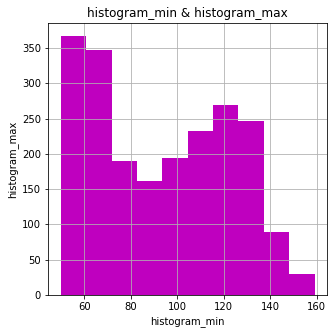

In [9]:
#Histogram for histogram_max & histogram_min
df['histogram_min'].hist(figsize=(5,5), color='m', alpha=1)
plt.xlabel('histogram_min')
plt.ylabel('histogram_max')
plt.title('histogram_min & histogram_max')

Text(0.5, 1.0, 'histogram_tendency & histogram_variance')

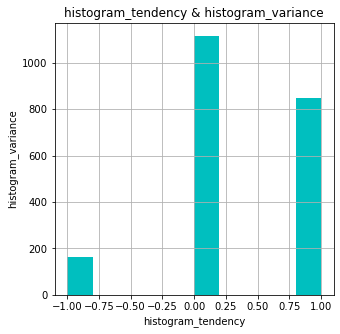

In [10]:
#Histogram for histogram_max & histogram_min
df['histogram_tendency'].hist(figsize=(5,5), color='c', alpha=1)
plt.xlabel('histogram_tendency')
plt.ylabel('histogram_variance')
plt.title('histogram_tendency & histogram_variance')

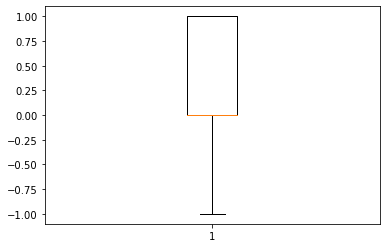

In [11]:
plt.boxplot(df['histogram_tendency'])
plt.show()

<AxesSubplot:xlabel='histogram_min'>

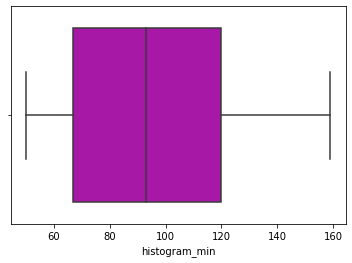

In [12]:
import seaborn as s
s.boxplot(df['histogram_min'], color='m')

In [13]:
df.columns

Index(['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

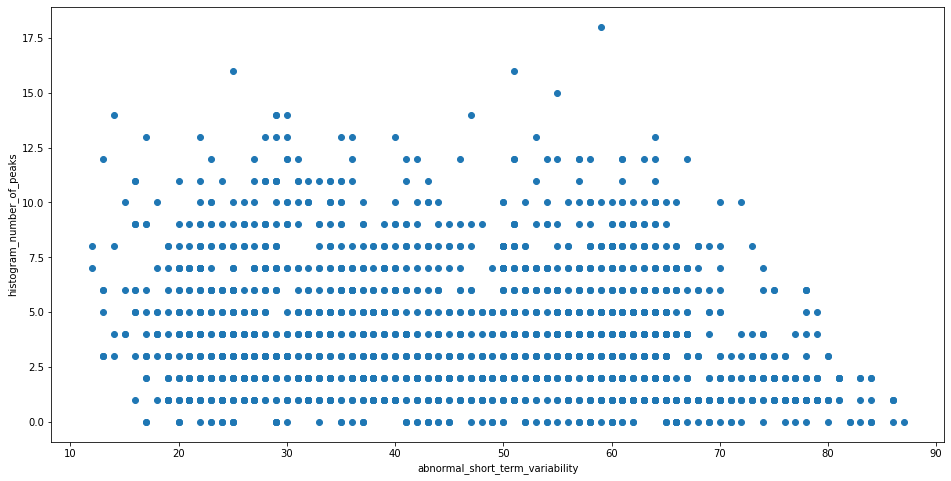

In [14]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['abnormal_short_term_variability'],df['histogram_number_of_peaks'])
ax.set_xlabel('abnormal_short_term_variability')
ax.set_ylabel('histogram_number_of_peaks')
plt.show()

0.000    15.62
0.005    13.64
0.004    11.48
0.006    10.87
0.007    10.16
0.003     9.97
0.002     7.53
0.008     7.53
0.001     5.55
0.009     3.86
0.010     2.30
0.011     0.75
0.012     0.52
0.014     0.09
0.013     0.09
0.015     0.05
Name: uterine_contractions, dtype: float64

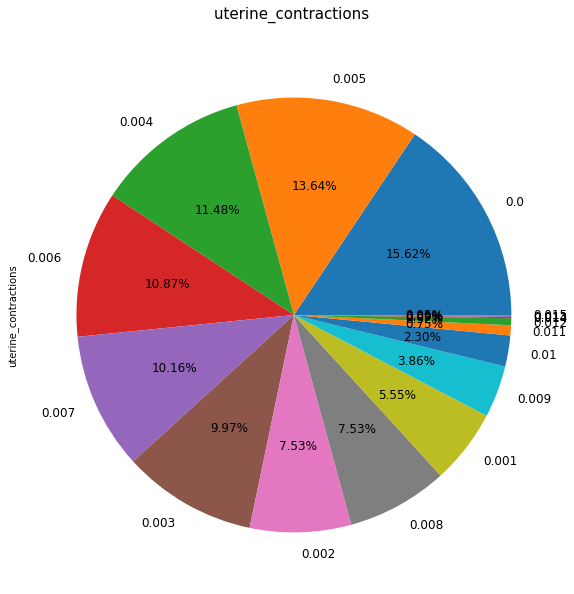

In [11]:
#Propagation by variable
def PropByVar(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12)
    ax.set_title(variable + ' \n', fontsize = 15)
    return n.round(dataframe_pie/df.shape[0]*100,2)

PropByVar(df, 'uterine_contractions')

<AxesSubplot:>

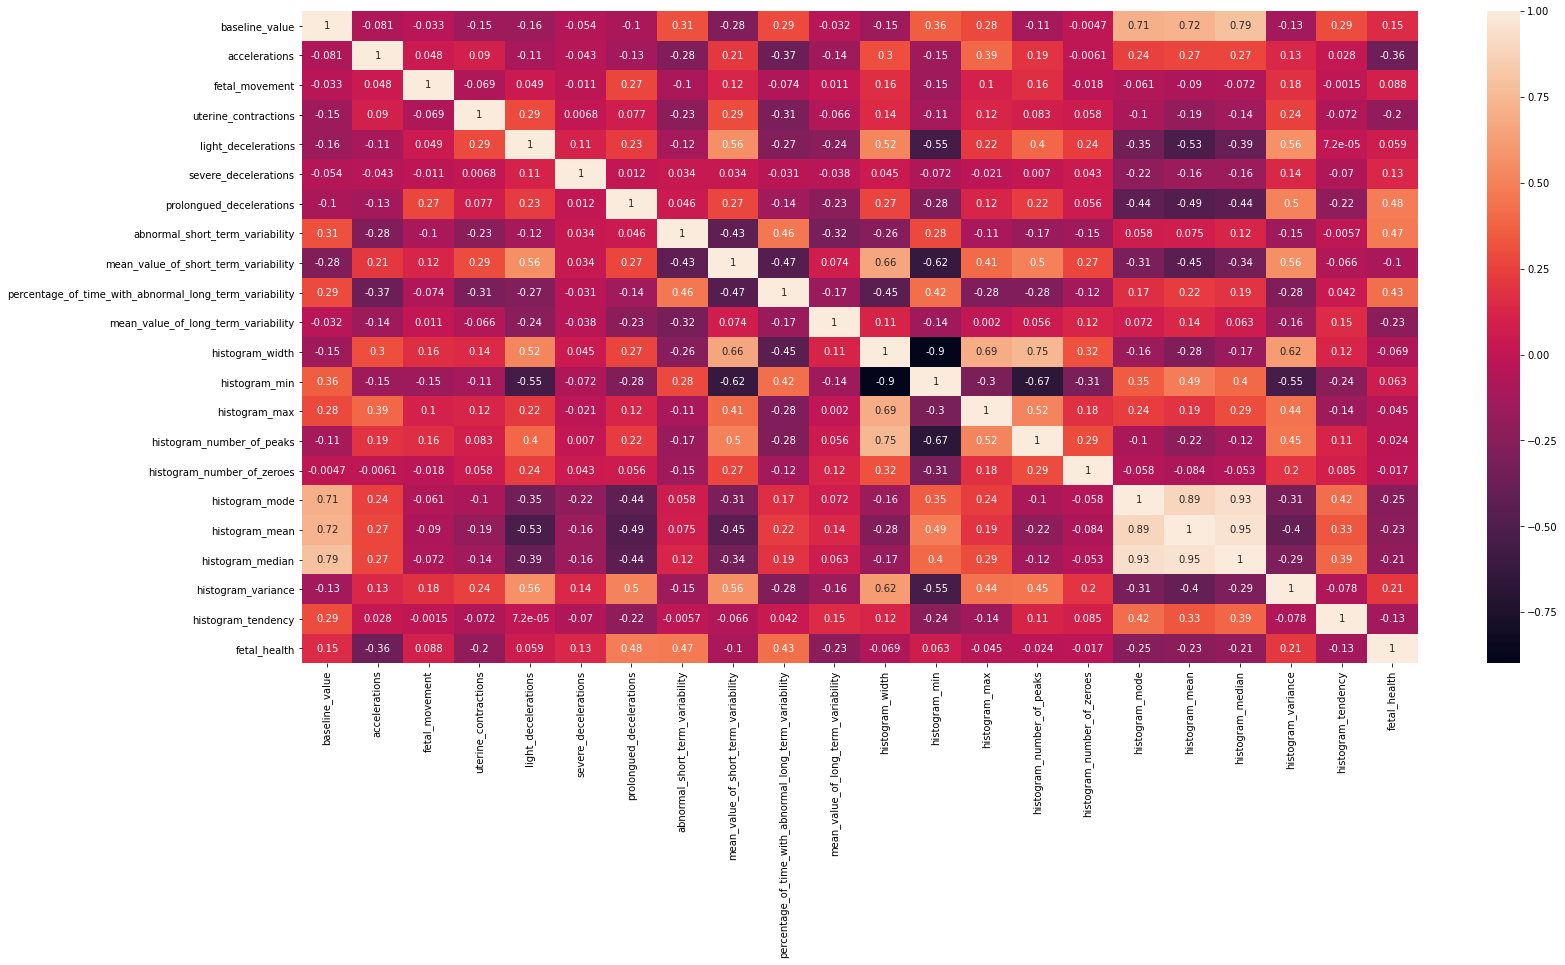

In [16]:
fig, ax = plt.subplots(figsize=(25,12))
s.heatmap(df.corr(), ax=ax, annot=True)

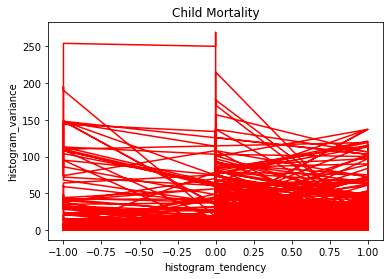

In [17]:
plt.plot(df["histogram_tendency"], df["histogram_variance"], color='r')
plt.xlabel('histogram_tendency')
plt.ylabel('histogram_variance')
plt.title('Child Mortality')
plt.show()

In [18]:
df['label'] = df.fetal_health.map({1:0,2:1,3:1})

In [20]:
del df['fetal_health']

In [21]:
df.columns

Index(['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'label'],
      dtype='object')

In [22]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='label', axis=1)
#Response variable
y = df.loc[:,'label']    

In [24]:
'''We'll use a test size of 30%. We also stratify the split on the response variable,
which is very important to do because there are so few fraudulent transactions'''

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))


Number of training dataset:  1488
Number of test dataset:  638
Total number of dataset:  2126
